In [38]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
# Reading processed data

data = pd.read_csv('Derived_data/Data_processed.csv')

### Analysing categorical features

In [40]:
cats = ['region', 'branch', 'client_gender','had_car_loan', 'had_other_loans', 'loan_type']

#### Region

In [41]:
# region data
regions = data[['region']]

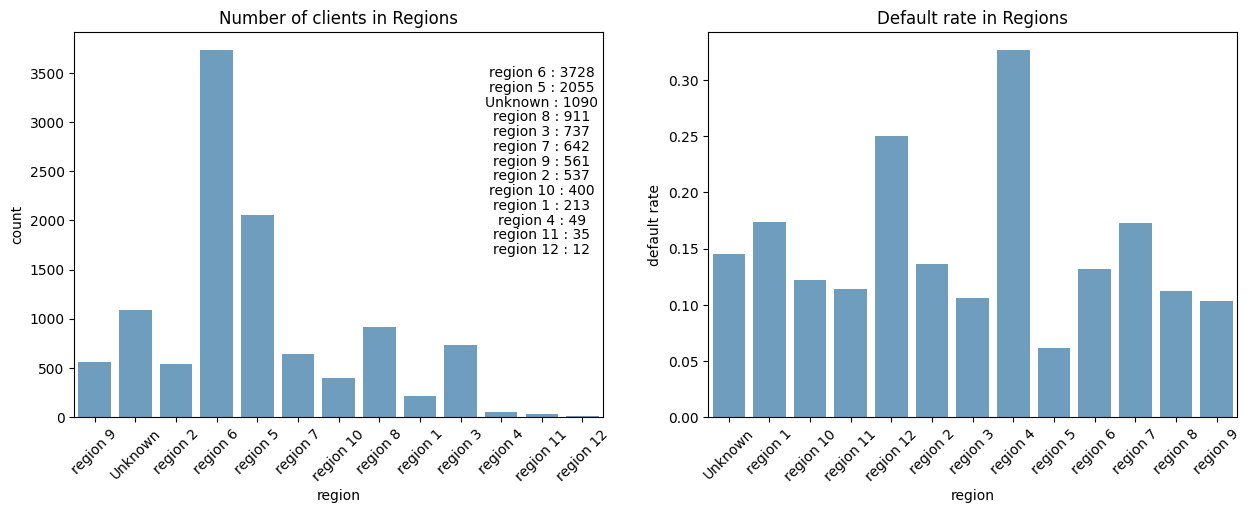

In [42]:
# Plotting region data

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.countplot(data=data, x = 'region', alpha = 0.7, ax = axes[0])

counts = data['region'].value_counts()

for i, reg in enumerate(zip(counts.index, counts.values)):
    x_pos = len(counts)-2
    y_pos =  max(counts)- 150 * (i+2)
    text_region = str(f"{reg[0]} : {reg[1]}")
    axes[0].text(x = x_pos, y = y_pos, s = text_region, 
                 ha='center', va='bottom', fontsize=10)

gr = data.groupby('region')['client_type'].apply(lambda x: (x == 'default').mean())
axes[1].set_ylabel('default rate')
sns.barplot(x = gr.index, y = gr.values, alpha = 0.7, ax=axes[1])

axes[0].tick_params(rotation = 45, axis = 'x')
axes[1].tick_params(rotation = 45, axis = 'x')
axes[0].set_title('Number of clients in Regions')
axes[1].set_title('Default rate in Regions')

plt.show()

#### Branch

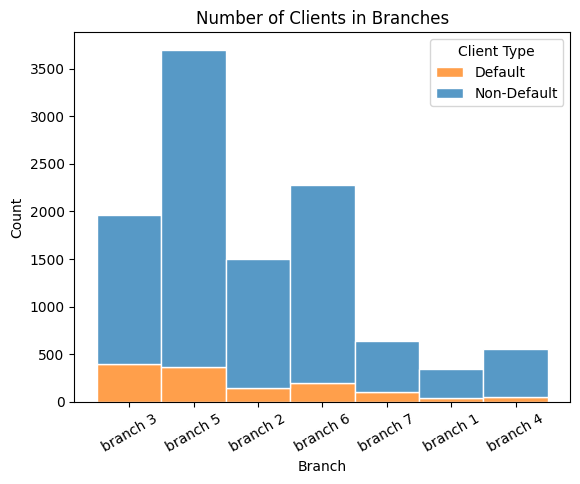

In [43]:
# Histogram on branch data

sns.histplot(data = data, x = 'branch', hue= data['client_type'] == 'default', multiple = 'stack', edgecolor='white')
plt.legend(labels=['Default', 'Non-Default'], title = 'Client Type')
plt.xticks(rotation = 30)
plt.xlabel('Branch')
plt.title('Number of Clients in Branches')
plt.show()

#### Gender

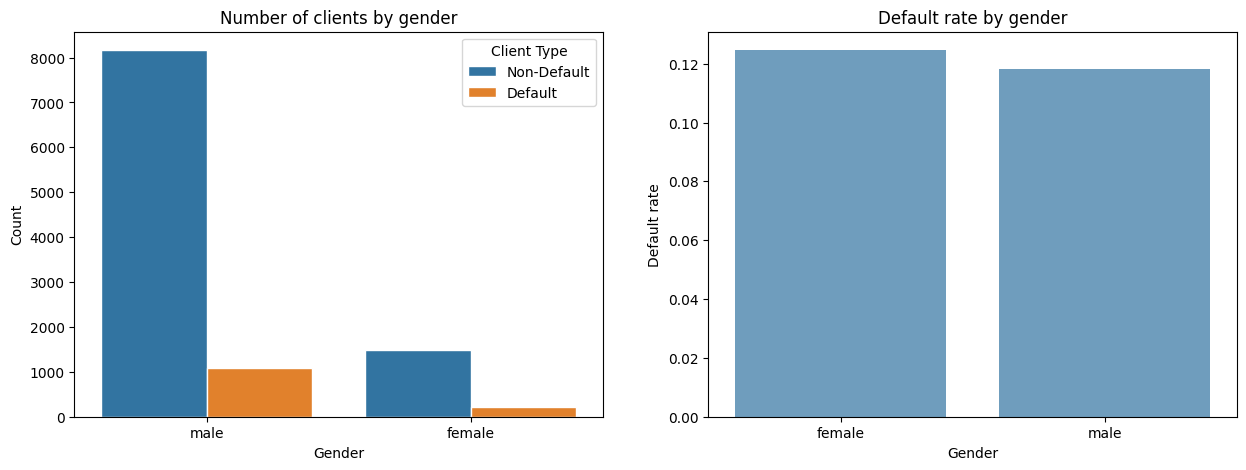

In [44]:
# Data distribution and histogram in gender subgroup

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.countplot(data = data, x = 'client_gender', hue= data['client_type'] == 'default', edgecolor='white', ax = axes[0])

gr = data.groupby('client_gender')['client_type'].apply(lambda x: (x == 'default').mean())
sns.barplot(x=gr.index, y = gr.values, alpha = 0.7, ax=axes[1])

axes[0].set_ylabel('Count')
axes[1].set_ylabel('Default rate')
axes[0].set_xlabel('Gender')
axes[1].set_xlabel('Gender')

axes[0].legend(labels=['Non-Default', 'Default'], title = 'Client Type')

axes[0].set_title('Number of clients by gender')
axes[1].set_title('Default rate by gender')

plt.show()

#### Other loans

C:\Users\razmik.manukyan\AppData\Local\Temp\ipykernel_42524\2792010606.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['No', 'Yes'])
C:\Users\razmik.manukyan\AppData\Local\Temp\ipykernel_42524\2792010606.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['No', 'Yes'])
C:\Users\razmik.manukyan\AppData\Local\Temp\ipykernel_42524\2792010606.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['No', 'Yes'])


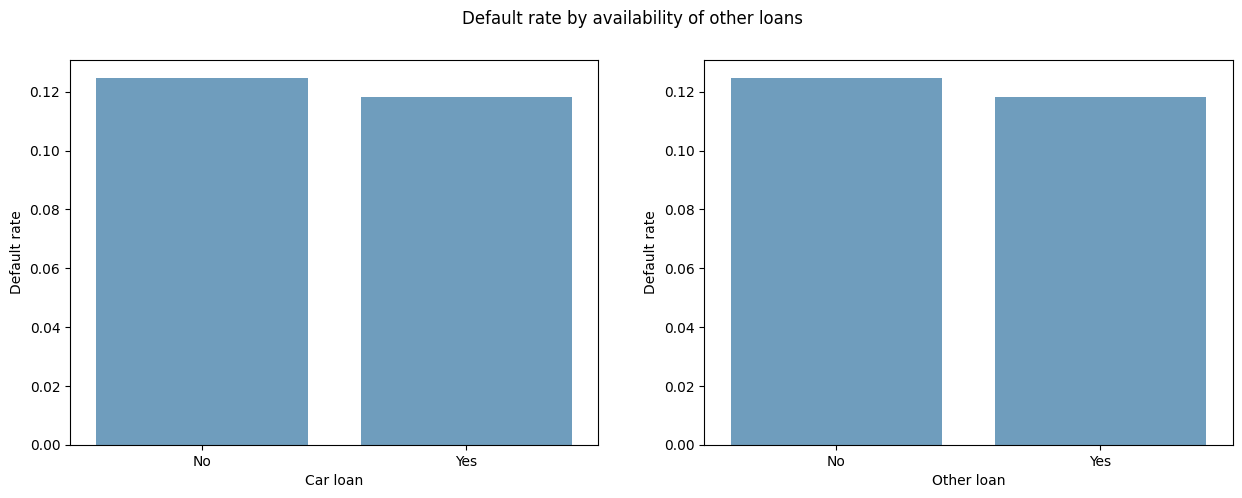

In [45]:
# Barplot of subgroup loan availability

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

gr1 = data.groupby('had_car_loan')['client_type'].apply(lambda x: (x == 'default').mean())
gr2 = data.groupby('had_other_loans')['client_type'].apply(lambda x: (x == 'default').mean())

sns.barplot(x=gr1.index, y = gr.values, alpha = 0.7, ax=axes[0])
sns.barplot(x=gr2.index, y = gr.values, alpha = 0.7, ax=axes[1])

axes[0].set_ylabel('Default rate')
axes[1].set_ylabel('Default rate')

axes[0].set_xlabel('Car loan')
axes[1].set_xlabel('Other loan')

axes[0].set_xticklabels(['No', 'Yes'])
axes[1].set_xticklabels(['No', 'Yes'])

fig.suptitle('Default rate by availability of other loans')
axes[1].set_xticklabels(['No', 'Yes'])

plt.show()

#### Loan type

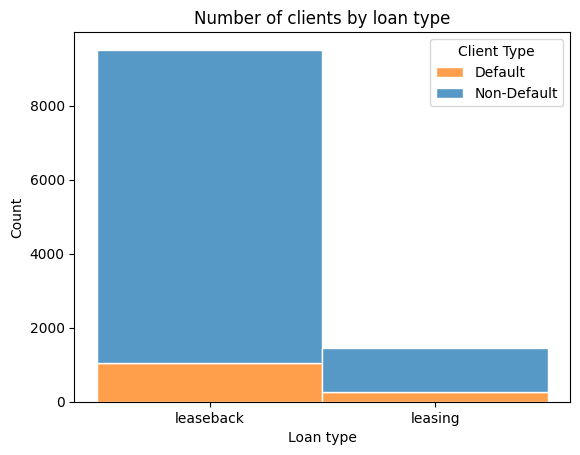

In [46]:
# Histogram of loan type subgroups

sns.histplot(data = data, x = 'loan_type', hue= data['client_type'] == 'default', multiple = 'stack', edgecolor='white')
plt.legend(labels=['Default', 'Non-Default'], title = 'Client Type')
plt.xlabel('Loan type')
plt.title('Number of clients by loan type')
plt.show()

### Analyzing numerical data

In [47]:
# Creating new column indicating default status

data['default_status'] = (data['client_type'] == 'default').astype(int)

In [48]:
numerical_data = ['income', 'vehicle_production_year', 'vehicle_initial_assessment_value', 'age',
        'loan_initial_term', 'loan_initial_amount', 'loan_to_value_ratio', 'annual_percentage_rate',
       'monthly_interest_rate']

In [49]:
data[numerical_data].corr()

,income,vehicle_production_year,vehicle_initial_assessment_value,age,loan_initial_term,loan_initial_amount,loan_to_value_ratio,annual_percentage_rate,monthly_interest_rate
income,1.000000,0.155441,0.294325,0.011812,0.008337,0.316600,0.012189,-0.057068,-0.046710
vehicle_production_year,0.155441,1.000000,0.526961,-0.083172,0.101329,0.445277,-0.124248,-0.110469,-0.125689
vehicle_initial_assessment_value,0.294325,0.526961,1.000000,-0.001893,0.145589,0.752832,-0.218517,-0.127298,-0.067679
age,0.011812,-0.083172,-0.001893,1.000000,0.014489,0.038715,0.069302,0.012744,0.051098
loan_initial_term,0.008337,0.101329,0.145589,0.014489,1.000000,0.308934,0.241690,-0.368091,-0.019681
loan_initial_amount,0.316600,0.445277,0.752832,0.038715,0.308934,1.000000,0.290380,-0.224706,-0.022979
loan_to_value_ratio,0.012189,-0.124248,-0.218517,0.069302,0.241690,0.290380,1.000000,-0.138577,0.058280
annual_percentage_rate,-0.057068,-0.110469,-0.127298,0.012744,-0.368091,-0.224706,-0.138577,1.000000,0.639360
monthly_interest_rate,-0.046710,-0.125689,-0.067679,0.051098,-0.019681,-0.022979,0.058280,0.639360,1.000000


**Only the values with relatively high correlations are loan_initial_amount and vehicle_initial_assessment_value, as well as annual_percentage_rate with monthly_interest_rate. This correlation arises because one variable was derived from another.**

#### Income

In [50]:
# Transforming income for normality
data['log_income'] = [x if x == 0 else np.log(x) for x in data['income']]

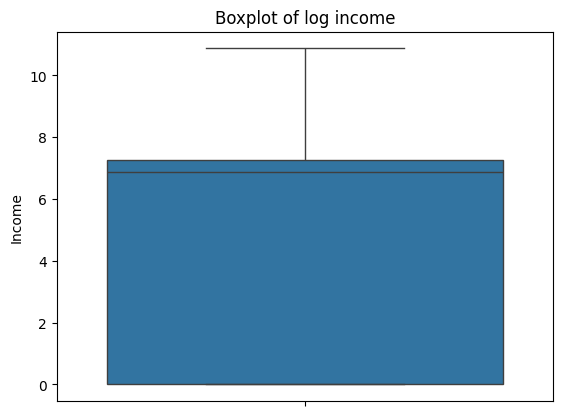

In [51]:
# Boxplot of log_income for outliers
sns.boxplot(data['log_income'])
plt.ylabel('Income')
plt.title('Boxplot of log income')
plt.show()

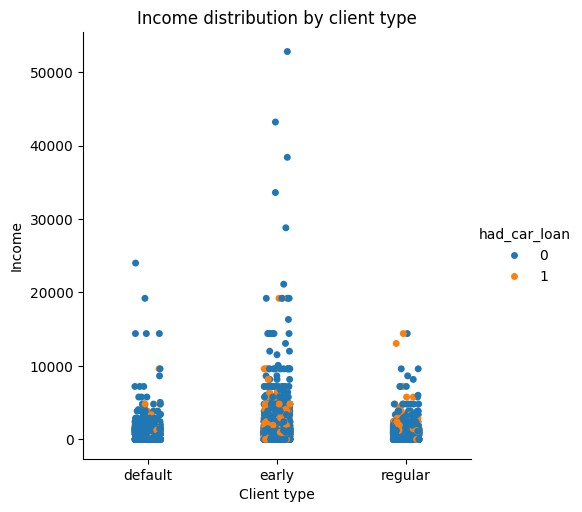

In [52]:
# Distribution of income in different client groups
cplot = sns.catplot(x = 'client_type', y = 'income', data = data, hue='had_car_loan')
plt.xlabel('Client type')
plt.ylabel('Income')
plt.title('Income distribution by client type')
plt.show()

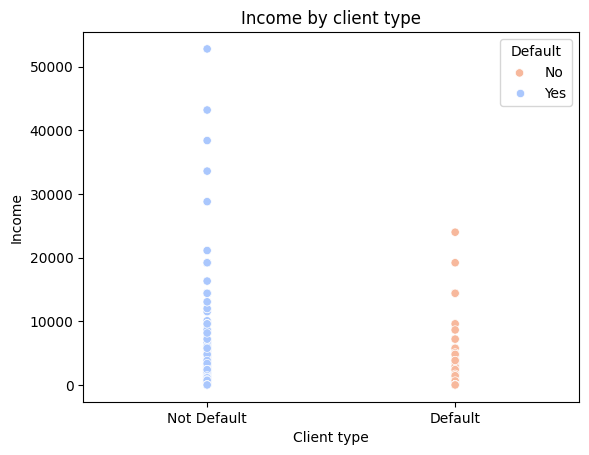

In [53]:
sns.scatterplot(data=data, y='income', x='default_status', hue='default_status', palette='coolwarm')
plt.xticks([1,0], labels=['Default', 'Not Default'])
plt.xlim(-0.5, 1.5)
plt.xlabel('Client type')
plt.ylabel('Income')
plt.legend(labels = ['No', 'Yes'], title = 'Default')
plt.title('Income by client type')
plt.show()

#### Vehicle

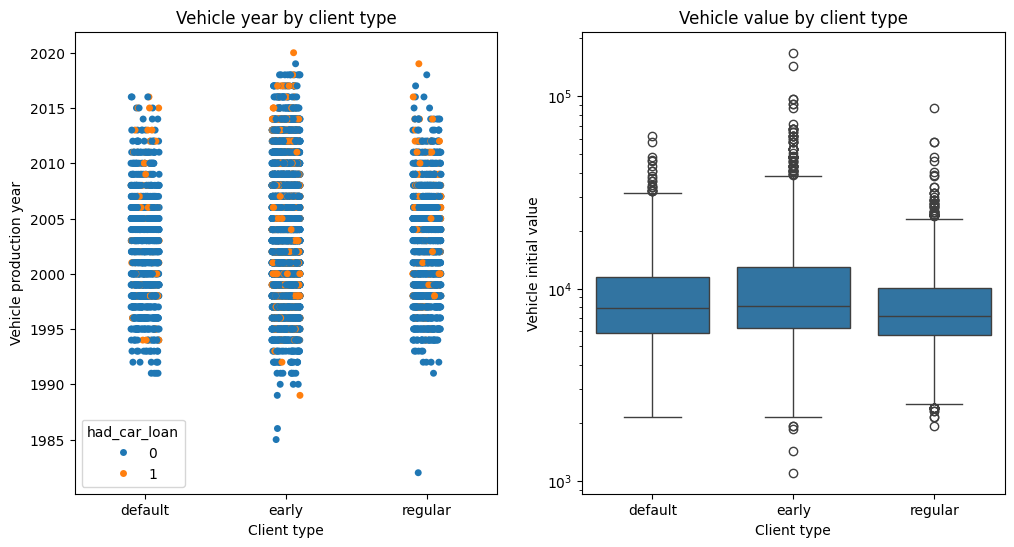

In [54]:
# Distribution of vehicle year and value in client groups
figure, axes = plt.subplots(ncols=2, nrows=1, figsize = (12,6))
sns.stripplot(x = 'client_type', y = 'vehicle_production_year', data = data, ax = axes[0], hue = 'had_car_loan')
sns.boxplot(x = 'client_type', y = 'vehicle_initial_assessment_value', data = data, log_scale=True, ax=axes[1])

axes[0].set_title('Vehicle year by client type')
axes[1].set_title('Vehicle value by client type')

axes[0].set_ylabel('Vehicle production year')
axes[1].set_ylabel('Vehicle initial value')

axes[0].set_xlabel('Client type')
axes[1].set_xlabel('Client type')

plt.show()

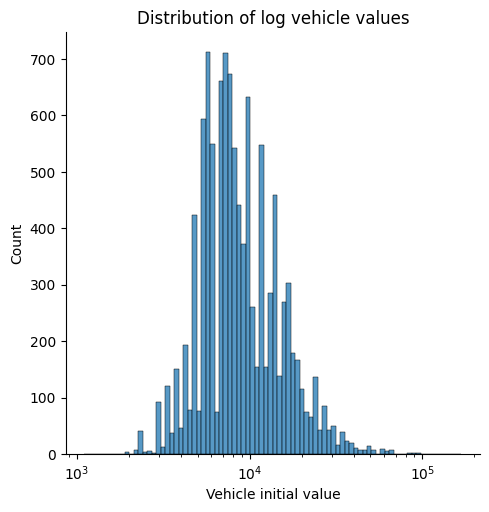

In [55]:
# Distribution of logarithm transform of vehicle value. Approximately has Normal distribution
sns.displot(data['vehicle_initial_assessment_value'], log_scale=True)
plt.xlabel('Vehicle initial value')
plt.title('Distribution of log vehicle values')
plt.show()

#### Age

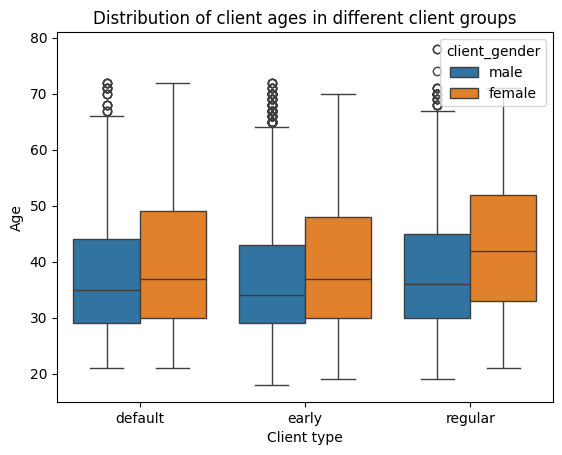

In [56]:
# Boxplots of Age
sns.boxplot(x = 'client_type', y = 'age', data = data, hue='client_gender')
plt.title('Distribution of client ages in different client groups')
plt.xlabel('Client type')
plt.ylabel('Age')
plt.show()

In [57]:
# Defining equal age groups
data['age_bins'] = pd.qcut(data['age'], q = 5)

C:\Users\razmik.manukyan\AppData\Local\Temp\ipykernel_42524\4175505091.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gr = data.groupby('age_bins')['client_type'].agg(lambda x: (x == 'default').mean())


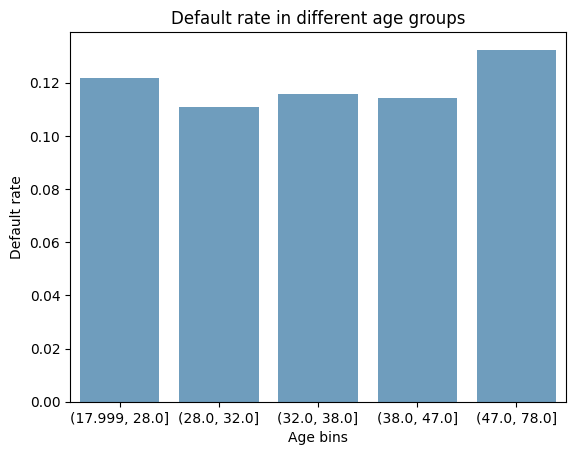

In [58]:
# Default rates in age groups
gr = data.groupby('age_bins')['client_type'].agg(lambda x: (x == 'default').mean())
sns.barplot(x=gr.index, y = gr.values, alpha = 0.7)
plt.xlabel('Age bins')
plt.ylabel('Default rate')
plt.title('Default rate in different age groups')
plt.show()

**In age group 47-78 default rate is a little bit higher**

#### Loan terms

<Axes: xlabel='client_type', ylabel='loan_to_value_ratio'>

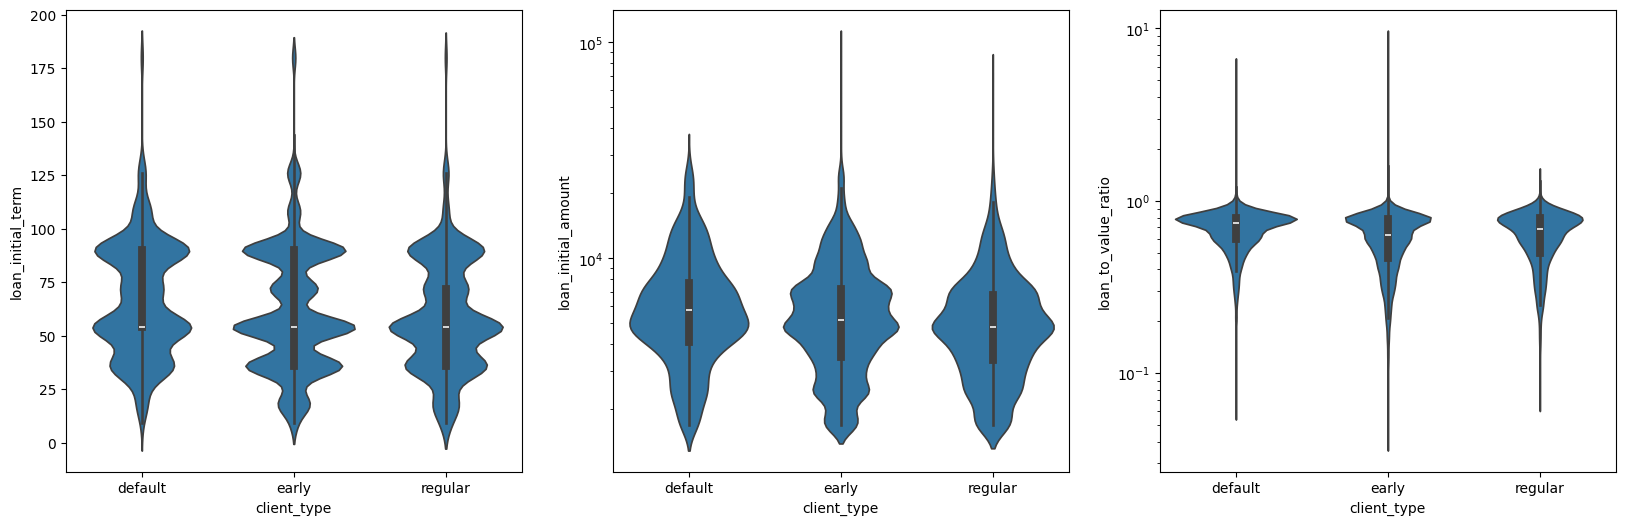

In [59]:
# Violin plots of loan terms
fig, axes = plt.subplots(ncols= 3, nrows=1, figsize = (20,6))
sns.violinplot(x = 'client_type', y = 'loan_initial_term', data = data, ax = axes[0])
sns.violinplot(x = 'client_type', y = 'loan_initial_amount', data = data, log_scale=True, ax = axes[1])
sns.violinplot(x = 'client_type', y = 'loan_to_value_ratio', data = data, log_scale=True, ax = axes[2])

In [60]:
# Defining oan term groups 
data['term_bins'] = pd.qcut(data['loan_initial_term'], q = 5)

C:\Users\razmik.manukyan\AppData\Local\Temp\ipykernel_42524\1715685009.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gr = data.groupby('term_bins')['client_type'].agg(lambda x: (x == 'default').mean())


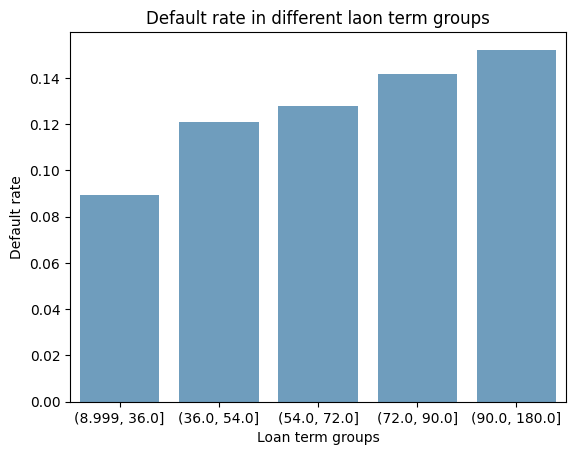

In [61]:
# Default rates in different term groups
gr = data.groupby('term_bins')['client_type'].agg(lambda x: (x == 'default').mean())
sns.barplot(x=gr.index, y = gr.values, alpha = 0.7)
plt.xlabel('Loan term groups')
plt.ylabel('Default rate')
plt.title('Default rate in different laon term groups')
plt.show()

**We can notice, the longer loan term the higher default rate**

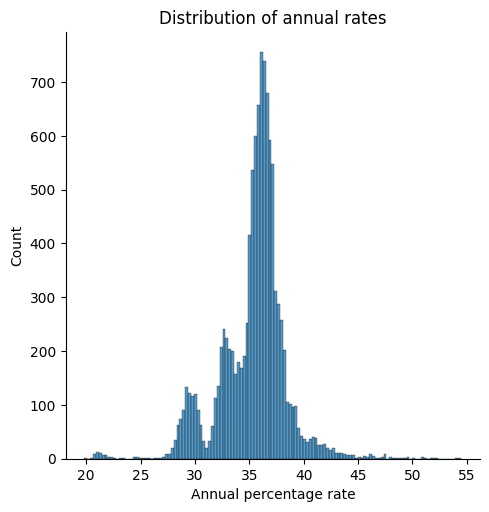

In [62]:
sns.displot(data['annual_percentage_rate'])
plt.title('Distribution of annual rates')
plt.xlabel('Annual percentage rate')
plt.show()

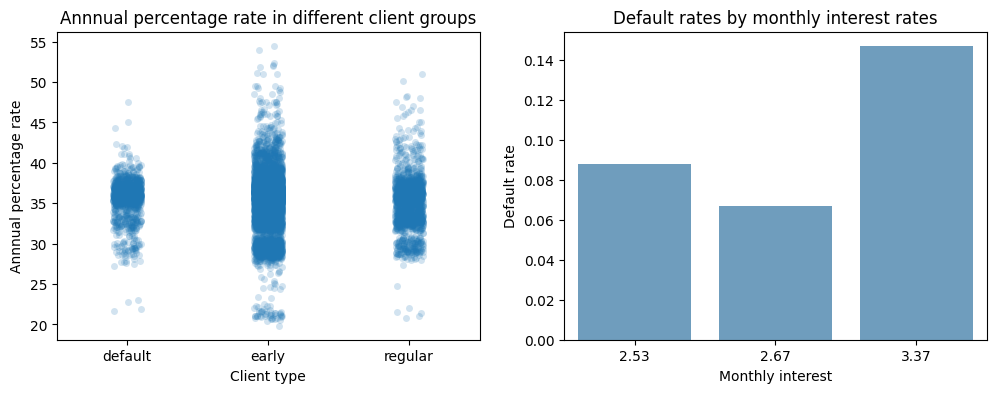

In [63]:
# Distribution of percentage rates in client subgroups and default rate in rate groups
fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (12, 4))

sns.stripplot(x = 'client_type', y = 'annual_percentage_rate', data = data, alpha = 0.2, ax = axes[0])
gr = data.groupby('monthly_interest_rate')['client_type'].agg(lambda x: (x == 'default').mean())

sns.barplot(x=map(lambda x: round(x, 2), gr.index), y = gr.values, alpha = 0.7, ax=axes[1])

axes[0].set_xlabel('Client type')
axes[1].set_xlabel('Monthly interest')

axes[0].set_ylabel('Annnual percentage rate')
axes[1].set_ylabel('Default rate')

axes[0].set_title('Annnual percentage rate in different client groups')
axes[1].set_title('Default rates by monthly interest rates')


plt.show()

**Default rate is the highest in the loan groups with the highest interest rate**

In [65]:
# Checking relation between variables with Chi-squared test 
from scipy.stats import chi2_contingency
print('The most important variables:')
print()
for i in numerical_data + cats:
    # Create a contingency table (cross-tabulation)
    contingency_table = pd.crosstab(data[i], data['client_type'])
    
    # Perform Chi-square test
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    # Print the results
    if p_value < 0.05:
        print(i)
        print(f"Chi-square statistic: {chi2}")
        print(f"P-value: {p_value}")
        print()


The most important variables:

vehicle_production_year
Chi-square statistic: 204.054611216723
P-value: 1.6064870237173873e-15

age
Chi-square statistic: 198.62827566807073
P-value: 8.706098921990596e-07

loan_initial_term
Chi-square statistic: 173.2823393843652
P-value: 3.819229490826872e-11

loan_initial_amount
Chi-square statistic: 603.0017921748561
P-value: 1.0329159192046519e-05

monthly_interest_rate
Chi-square statistic: 299.4784104200223
P-value: 1.403833732473368e-63

region
Chi-square statistic: 211.8812883631841
P-value: 5.154524013516724e-32

branch
Chi-square statistic: 247.81665215283283
P-value: 3.902619597683995e-46

had_car_loan
Chi-square statistic: 27.499320916904225
P-value: 1.0680666014609783e-06

had_other_loans
Chi-square statistic: 45.31730402482406
P-value: 1.4436850648199914e-10

loan_type
Chi-square statistic: 66.8416088204771
P-value: 3.058644930369531e-15

